In [7]:
import csv
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#MahwishRana
# Create SQLite database and table
def create_database(db_name, table_name, columns):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    # Create table
    create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({', '.join(columns)})"
    cursor.execute(create_table_query)
    conn.commit()
    conn.close()

# Extracting relevant data from CSV
def extract_data(csv_file):
    relevant_data = []
    with open(csv_file, 'r', encoding='ISO-8859-1') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row
        for row in csv_reader:
            relevant_row = [row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]]  # Extract all columns
            relevant_data.append(relevant_row)
    return relevant_data

# Inserting data into SQLite table from extracted data
def insert_data_into_sqlite(db_name, table_name, data):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    # Code to insert query
    insert_query = f"INSERT INTO {table_name} VALUES ({', '.join(['?' for _ in range(len(data[0]))])})"
    # Insert data into table
    cursor.executemany(insert_query, data)
    conn.commit()
    conn.close()

# Database and table details
database_name = 'onlineretail_data.sqlite'  
table_name = 'OnlineRetail'
columns = ['InvoiceNo TEXT', 'StockCode TEXT', 'Description TEXT', 'Quantity INTEGER', 'InvoiceDate TEXT', 'UnitPrice REAL', 'CustomerID TEXT', 'Country TEXT']

# Creating database and table
create_database(database_name, table_name, columns)

# CSV file to extract data from
csv_file = 'OnlineRetail.csv'

# Extract relevant data from CSV
relevant_data = extract_data(csv_file)

# Validating and inserting data into SQLite table
insert_data_into_sqlite(database_name, table_name, relevant_data)

# Printing number of rows inserted
print(f"Number of rows inserted: {len(relevant_data)}")


Number of rows inserted: 541909


In [19]:
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Bad Values (if any)
bad_values_quantity = df[df['Quantity'] < 0]
bad_values_unit_price = df[df['UnitPrice'] < 0]
print("\nBad Values (Negative Quantity):")
print(bad_values_quantity)
print("\nBad Values (Negative UnitPrice):")
print(bad_values_unit_price)

# Checking data formats
data_formats = df.dtypes
print("\nData Formats:")
print(data_formats)



Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Bad Values (Negative Quantity):
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     8

In [20]:
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Drop rows with missing 'Description' or 'CustomerID'
df_cleaned = df.dropna(subset=['Description', 'CustomerID'])

# Remove rows with negative unit prices
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] >= 0]

# Checking for missing values again
missing_values_cleaned = df_cleaned.isnull().sum()
print("Missing Values After Cleaning:")
print(missing_values_cleaned)



Missing Values After Cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [21]:
# Cleaning the data
df_cleaned = df.dropna(subset=['Description', 'CustomerID'])
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] >= 0]

# Defining function to write cleaned data
def write_cleaned_data_to_database(db_name, table_name, cleaned_data):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Create new table for cleaned data
    create_table_query = f"CREATE TABLE IF NOT EXISTS Cleaned_{table_name} ({', '.join(columns)})"
    cursor.execute(create_table_query)

    # Inserting cleaned data into new table
    insert_query = f"INSERT INTO Cleaned_{table_name} VALUES ({', '.join(['?' for _ in range(len(cleaned_data.columns))])})"
    cursor.executemany(insert_query, cleaned_data.values)

    conn.commit()
    conn.close()

# Defining database and table details
database_name = 'onlineretail_data.sqlite'
table_name = 'OnlineRetail'
columns = ['InvoiceNo TEXT', 'StockCode TEXT', 'Description TEXT', 'Quantity INTEGER', 'InvoiceDate TEXT', 'UnitPrice REAL', 'CustomerID TEXT', 'Country TEXT']

# Writing cleaned data to SQLite database
write_cleaned_data_to_database(database_name, table_name, df_cleaned)

# Printing number of rows inserted
print(f"Number of rows inserted: {len(df_cleaned)}")


Number of rows inserted: 406829


In [22]:
#What products are selling the most?
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Group by product description and sum the quantities sold
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by the total quantity sold in descending order
top_selling_products = product_sales.sort_values(by='Quantity', ascending=False)

# Display the top 10 selling products
top_10_selling_products = top_selling_products.head(10)
print("Top 10 Selling Products:")
print(top_10_selling_products)



Top 10 Selling Products:
                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


In [27]:
#Total profit each month? 
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Converting 'InvoiceDate' column to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculating revenue for each transaction
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Extracting month from 'InvoiceDate' and creating a new column
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by month and sum revenue
monthly_profit = df.groupby('Month')['Revenue'].sum()

print("Total profit each month:")
print(monthly_profit)



Total profit each month:
Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: Revenue, dtype: float64


In [28]:
#Average products sold per month?
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Converting 'InvoiceDate' column to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by month and sum quantities sold
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Calculating the average quantity sold per month
average_products_per_month = monthly_sales.mean()

print("Average products sold per month:", average_products_per_month)


Average products sold per month: 431370.8333333333


In [30]:
#How many customers repurchase items?
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Converting 'InvoiceDate' column to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Droping rows with missing 'CustomerID'
df_cleaned = df.dropna(subset=['CustomerID'])

# Finding customers who have made more than one purchase
repurchasing_customers = df_cleaned.groupby('CustomerID').filter(lambda x: len(x) > 1)

# Counting the number of repurchasing customers
num_repurchasing_customers = repurchasing_customers['CustomerID'].nunique()

print("Number of customers who repurchase items:", num_repurchasing_customers)

Number of customers who repurchase items: 4293


In [31]:
#How many new customers per month?
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Converting 'InvoiceDate' column to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Grouping by month and counting 
new_customers_per_month = df.groupby('Month')['CustomerID'].nunique()

print("Number of new customers per month:")
print(new_customers_per_month)


Number of new customers per month:
Month
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64


In [22]:
#What products are selling the least?
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

least_selling_products = product_sales.sort_values(by='Quantity', ascending=True)

print("Products selling the least:")
print(least_selling_products.head())


Products selling the least:
                       Description  Quantity
4167  printing smudges/thrown away    -19200
3740        Unsaleable, destroyed.    -15644
4116                         check    -12030
2796  Printing smudges/thrown away     -9058
1123                       Damaged     -7540


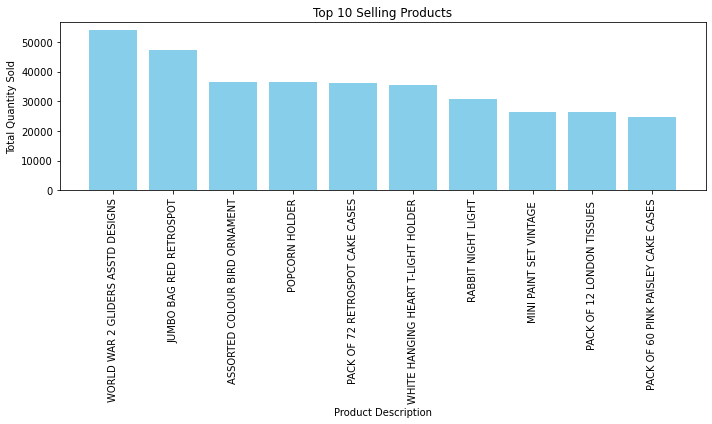

In [32]:
# Bar plot: Top 10 selling products
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

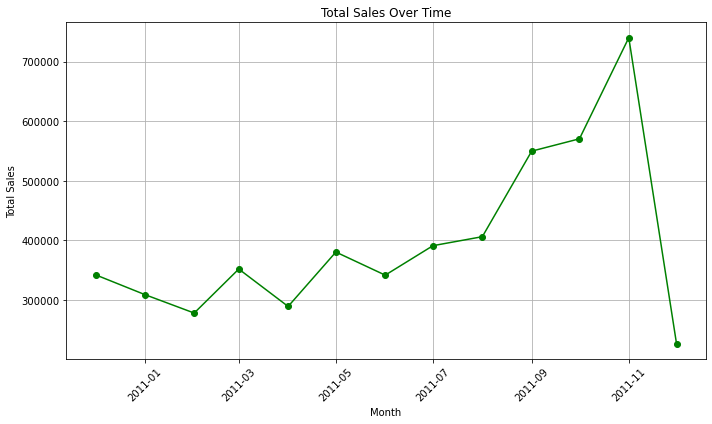

In [24]:
# Line plot: Total sales over time (monthly)
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

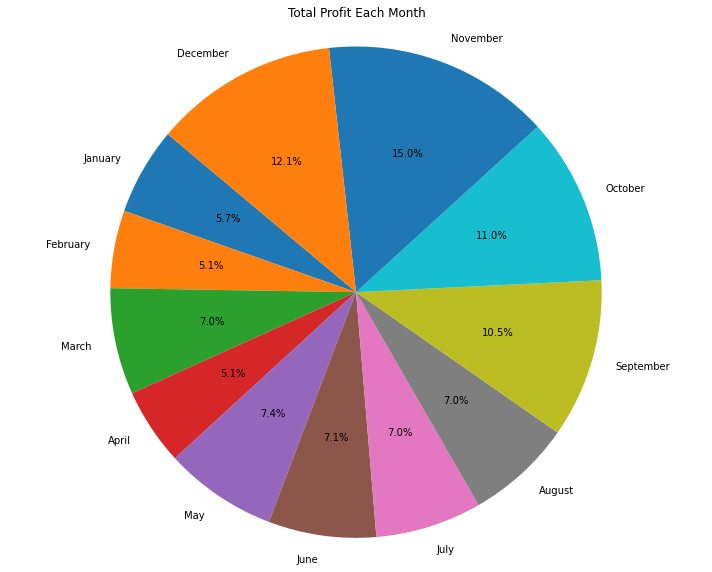

In [33]:
# Pie Chart: Total Profit Per month
# List of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 8))
plt.pie(monthly_profit, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Total Profit Each Month')
plt.tight_layout()
plt.show()

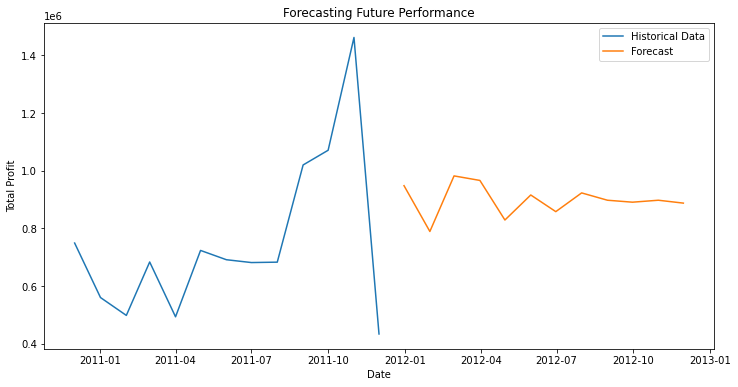

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Converting 'InvoiceDate' column to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculating total profit for each month
df['TotalProfit'] = df['Quantity'] * df['UnitPrice']
total_profit_per_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalProfit'].sum().reset_index()

# Fit ARIMA model
model = ARIMA(total_profit_per_month['TotalProfit'], order=(5,1,0))  
model_fit = model.fit()

# Forecasting future profitability trends
forecast_steps = 12 
forecast = model_fit.forecast(steps=forecast_steps)

# Convert period to datetime for plotting
total_profit_per_month['InvoiceDate'] = total_profit_per_month['InvoiceDate'].dt.to_timestamp()

# Plotting historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(total_profit_per_month['InvoiceDate'], total_profit_per_month['TotalProfit'], label='Historical Data')
plt.plot(pd.date_range(start=total_profit_per_month['InvoiceDate'].iloc[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.title('Forecasting Future Performance')
plt.legend()
plt.show()
